# Part I - Suicide Rate Analysis
## by Philip Obiorah


### Introduction
According to World Health Organization (WHO), every year nearly 800 000 people die due  to  suicide.  Suicides  are  preventable.  There  are  several  measures  that  can  be taken at population, subpopulation, and individual levels to prevent suicide and suicide attempts.


In this project, we shall try to understand which age groups are vulnerable to suicide, we will look at the suicide rates of countries involved in the surveys from 1985 to 2016 provided in the dataset named WHO_Suicide_Data.csv.

Note: The dataset is not clean, and data might not be absolutely correct. Whatever conclusions drawn from this exercise, should be interpreted in that light.

### Gathering

In [508]:
#Import the requied libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [509]:
#Load the dataset (WHO_Suicide_Data.csv)
suicide_data = pd.read_csv("WHO_Suicide_Data.csv")
suicide_data.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),Unnamed: 7,Unnamed: 8
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",NaN,NaN
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",NaN,NaN


### Accessing Data
WHO Suicide Data

In [510]:
suicide_data

,country,year,sex,age,suicides_no,population,gdp_for_year ($),Unnamed: 7,Unnamed: 8
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",NaN,NaN
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",NaN,NaN
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",NaN,NaN
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",NaN,NaN
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",NaN,NaN
...,...,...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887",NaN,NaN
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833",NaN,NaN
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419",NaN,NaN
27838,Grenada,2002,female,5-14 years,NaN,11760,"540,336,926",NaN,NaN


In [511]:
# View the datatypes
suicide_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no            object
population              int64
 gdp_for_year ($)      object
Unnamed: 7            float64
Unnamed: 8             object
dtype: object

*WHO Suicide Data * :
Dataset has 27840 rows and 9 columns
##### suicide_data columns :
- country: Country which has record of suicides
- year : Year in which suicides were  recorded	
- sex	: Gender of the individuals who committed suicide
- age	: Age range of the the individuals who committed suicide
- suicides_no	: Number of suicide committed with a certain year
- population : Population of the age group within the country 	
- gdp_for_year ($) Gross Domestic Product of the country

In [512]:
# Random selection of 10 samples for visual accessment  
suicide_data.sample(10)

,country,year,sex,age,suicides_no,population,gdp_for_year ($),Unnamed: 7,Unnamed: 8
22479,Singapore,1991,female,25-34 years,28,292600,"45,474,442,836",NaN,NaN
25928,Turkmenistan,2004,male,55-74 years,13,146331,"6,838,351,088",NaN,NaN
16597,Mexico,1987,female,75+ years,4,599100,"140,263,387,027",NaN,NaN
13757,Kazakhstan,1991,female,25-34 years,14,1438900,"24,881,135,586",NaN,NaN
14350,Kuwait,2004,female,35-54 years,7,212485,"59,440,108,585",NaN,NaN
23393,South Africa,2004,female,55-74 years,8,2212147,"228,937,347,866",NaN,NaN
25344,Trinidad and Tobago,1987,female,55-74 years,2,57900,"4,797,777,778",NaN,NaN
12816,Italy,1987,male,25-34 years,425,4142000,"803,055,418,883",NaN,NaN
17443,Netherlands,2016,female,55-74 years,29,2037375,"777,227,541,581",NaN,NaN
4991,Canada,1991,male,35-54 years,974,3663400,"610,328,183,643",NaN,NaN


In [513]:
# Lets check for Quality and Tidyness
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27840 entries, 0 to 27839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27840 non-null  object 
 1   year                27840 non-null  int64  
 2   sex                 27840 non-null  object 
 3   age                 27840 non-null  object 
 4   suicides_no         23575 non-null  object 
 5   population          27840 non-null  int64  
 6    gdp_for_year ($)   27840 non-null  object 
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          2 non-null      object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [514]:
# Let us check for null values
suicide_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            4265
population                0
 gdp_for_year ($)         0
Unnamed: 7            27840
Unnamed: 8            27838
dtype: int64

In [515]:
#Let us check for duplicate rows
suicide_data.duplicated().sum()


20

In [516]:
# View duplicate rows
suicide_data[suicide_data.duplicated()]

,country,year,sex,age,suicides_no,population,gdp_for_year ($),Unnamed: 7,Unnamed: 8
27820,Republic of Korea,1992,male,15-24 years,48,4456500,"350,051,111,253",NaN,NaN
27821,Bulgaria,2003,male,5-14 years,6,407671,"20,982,685,981",NaN,NaN
27822,South Africa,2009,female,75+ years,3,502919,"297,216,730,669",NaN,NaN
27823,Canada,2006,female,25-34 years,118,2177957,"1,315,415,197,461",NaN,NaN
27824,Austria,2003,female,5-14 years,NaN,457342,"261,695,778,781",NaN,NaN
27825,Saint Vincent and Grenadines,2009,female,5-14 years,NaN,9944,"674,922,481",NaN,NaN
27826,Azerbaijan,2003,female,35-54 years,12,1137200,"7,276,013,032",NaN,NaN
27827,Suriname,2010,male,15-24 years,18,48112,"4,368,398,048",NaN,NaN
27828,Seychelles,1987,female,25-34 years,NaN,4800,"249,267,040",NaN,NaN
27829,Puerto Rico,1992,female,75+ years,2,82500,"34,630,430,000",NaN,NaN


In [517]:
#Lets check the values in the sex column
suicide_data["sex"].unique()

array(['male', 'female'], dtype=object)

In [518]:
#Descriptive stats for numeric values
suicide_data.describe()

,year,population,Unnamed: 7
count,27840.000000,2.784000e+04,0.0
mean,2001.257938,1.844351e+06,NaN
std,8.469224,3.910568e+06,NaN
min,1985.000000,2.780000e+02,NaN
25%,1995.000000,9.749850e+04,NaN
50%,2002.000000,4.303575e+05,NaN
75%,2008.000000,1.486328e+06,NaN
max,2016.000000,4.380521e+07,NaN


#### (a) Issues/Problems Identified in the dataset
- Missing data in `suicides_no` 
- Two unnamed and empty columns
- Space in column name for gdp_for_year 
- Incorrect datatype for ` gdp_for_year ($)
- Incorrect datatye for `suicides_no`
- String objects in gdp_for_year has commas`
- There are 20 duplicate rows
- 'suicides_no' column contains other non-numeric values  present in the column


### Data Cleaning

In [519]:
#Let us make a copy of the orignal dataset.
suicide_data_clean = suicide_data.copy()

#### Two unnamed and empty columns

##### Define
- Drop empty columns `Unnamed: 7` and `Unnamed: 8`

##### Code

In [520]:
# Drop empty columns Unnamed: 7 and Unnamed: 8
suicide_data_clean = suicide_data_clean.drop(['Unnamed: 7','Unnamed: 8'], axis=1)

##### Test

In [521]:
# Test to confirm  empty columns Unnamed: 7 and Unnamed: 8 are dropped
suicide_data_clean.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"


#### Missing data in suicides_no

##### Define
- Remove rows with missing data


##### Code

In [522]:
# Let us drop rows with missing data
suicide_data_clean= suicide_data_clean.dropna()

##### Test

In [523]:
# Confirm that `suicides_no` is now int
suicide_data_clean['suicides_no'].dtype

dtype('O')

In [524]:
# Test to confirm that there are no null values or missing values
suicide_data_clean.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
 gdp_for_year ($)     0
dtype: int64

In [525]:
# Test to confirm that other rows remained after removing rows with missing data.
suicide_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23575 entries, 0 to 27839
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             23575 non-null  object
 1   year                23575 non-null  int64 
 2   sex                 23575 non-null  object
 3   age                 23575 non-null  object
 4   suicides_no         23575 non-null  object
 5   population          23575 non-null  int64 
 6    gdp_for_year ($)   23575 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [526]:
suicide_data_clean.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       ' gdp_for_year ($) '],
      dtype='object')

#### Space in column name for gdp_for_year ($)

##### Define
- Rename column `gdp_for_year ($)` to `gdp_for_year`


##### Code

In [527]:
#Rename column `gdp_for_year ($)` using index number
suicide_data_clean = suicide_data_clean.rename(columns={' gdp_for_year ($) ': 'gdp_for_year'})
suicide_data_clean['gdp_for_year']

0          2,156,624,900
1          2,156,624,900
2          2,156,624,900
3          2,156,624,900
4          2,156,624,900
              ...       
27834     86,142,018,069
27835    527,008,453,887
27836    411,755,164,833
27837    432,476,116,419
27839    183,144,164,357
Name: gdp_for_year, Length: 23575, dtype: object

##### Test

In [528]:
#Test renaming of column `gdp_for_year ($)` to `gdp_for_year`
suicide_data_clean.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_for_year'], dtype=object)

In [529]:
#Test renaming of column `gdp_for_year ($)` to `gdp_for_year`
suicide_data_clean

,country,year,sex,age,suicides_no,population,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,"86,142,018,069"
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419"


#### String objects in gdp_for_year has commas`

##### Define
- Replace the commas in `gdp_for_year` column with `''`(empty strings)

##### Code


In [530]:
#Replace the commas in gdp_for_year column with ''(empty strings)
suicide_data_clean['gdp_for_year'] = suicide_data_clean['gdp_for_year'].str.replace(',', '')



##### Test

In [531]:
# Test replacement the commas in gdp_for_year column with ''(empty strings)
suicide_data_clean['gdp_for_year']

0          2156624900
1          2156624900
2          2156624900
3          2156624900
4          2156624900
             ...     
27834     86142018069
27835    527008453887
27836    411755164833
27837    432476116419
27839    183144164357
Name: gdp_for_year, Length: 23575, dtype: object

#### Incorrect datatype for ` gdp_for_year 
#### Incorrect datatye for `suicides_no`

##### Define
- Change datatype for gdp_for_year to integer
- Change datatype for `suicides_no` to integer

##### Code

In [532]:
# Change datatype for gdp_for_year to integer
suicide_data_clean['gdp_for_year'] = suicide_data_clean['gdp_for_year'].astype(int)


##### Test

In [533]:
# Test change  of datatype for gdp_for_year to integer
suicide_data_clean['gdp_for_year'].dtype

dtype('int64')

#### `suicides_no` column has other non-numeric values  present in the column


##### Define
- Replace any non-numeric values with NaN using the pd.to_numeric method
- Drop any rows with missing values

##### Code

In [534]:
#Replace any non-numeric values with NaN using the pd.to_numeric method
suicide_data_clean['suicides_no'] = pd.to_numeric(suicide_data_clean['suicides_no'], errors='coerce')

In [535]:
#Drop any rows with missing values
suicide_data_clean.dropna(subset=['suicides_no'], inplace=True)

##### Test

In [536]:
# Confirm that their are no Null or NaN 
suicide_data_clean['suicides_no'].isna().sum()

0

#### Incorrect datatye for suicides_no

##### Define
- Convert the 'suicides_no' column to integer

##### Code 

In [537]:
# Convert the 'suicides_no' column to integer
suicide_data_clean['suicides_no'] = suicide_data_clean['suicides_no'].astype(int)

##### Test

#### There are 20 duplicate rows

##### Define
- Remove duplicate rows 

##### Code


In [538]:
#Remove duplicate rows 
suicide_data_clean = suicide_data_clean.drop_duplicates(keep="first")

##### Test

In [539]:
# Confirm that there are no more duplicate rows
suicide_data_clean.duplicated().sum()

0

In [540]:
# View the the shape of the dataset
suicide_data_clean.shape

(23539, 7)

In [541]:
# view the numerical dataset 
suicide_data_clean.describe()

,year,suicides_no,population,gdp_for_year
count,23539.000000,23539.000000,2.353900e+04,2.353900e+04
mean,2001.290157,217.892391,2.161400e+06,5.220250e+11
std,8.456363,787.073878,4.171983e+06,1.567854e+12
min,1985.000000,1.000000,8.890000e+02,4.691962e+07
25%,1995.000000,6.000000,2.387225e+05,1.596873e+10
50%,2002.000000,29.000000,5.884300e+05,7.621644e+10
75%,2009.000000,131.000000,2.107592e+06,3.233204e+11
max,2016.000000,22338.000000,4.380521e+07,1.812071e+13


### Data Storage

After the data cleaning process it is appropriate that we store our clean datasdet into a new csv file

In [542]:
suicide_data_clean.to_csv('suicide_data_clean.csv', index=False)

### Data Analysis

We shall attempt to implement the following in our analysis
- (b) Add  a  new  column “suicides/100k”  and  generate  its  data  suicides/100k population  of  a  country  is  the  population  of  a  specific  age  group  and  gender within that country divided by 100000, and the number of suicides divided by that number  Example: Its “suicides/100k” value is 21/(312900/100000) = 6.7114
- (c) Add a new column “generation” and fill up its data according to below criteria 
| Value | Criteria | 
| --- | --- |
| Lost Generation  | born between 1883 -1900 | 
| G.I. Generation  | born between 1901 -1927 | 
| Silent    | born between 1928 -1945 | 
| Boomers | born between 1946 –1964 | 
| Generation X  | born between 1965 -1980 | 
| Millennials   | born between 1981 -1996 | 
| Generation Z   | born between 1997–2012 | 
| Generation A    | born between 2013–2025 | 





- d)Add a new  column  “gdp_per_capita” and  fill  its  data.  GDP  per  Capita  of a country is GDP divided by population of that country
- e)Rank countries by total suicides
- f)Find the correlations between suicides, GDP per capita and population. What are your conclusions?
- g)Use appropriate visual notation to visualise total suicides over years. Describe your findings
- h)Compare suicides by gender over years and state your conclusions
- i)Calculate  and  Visualise  suicides  on  generation  and  on  age  group.  Describe your findings.
- Code modularity –use of sensible variable names, code structure, comments 

We shall load the `suicide_data_clean.csv` into `suicide_master_df` dataframe.

In [543]:
#load the clean suicide dataset
suicide_master_df = pd.read_csv("suicide_data_clean.csv")
suicide_master_df.sample(20)

,country,year,sex,age,suicides_no,population,gdp_for_year
4874,Costa Rica,2007,male,5-14 years,1,403466,26743874206
4313,Colombia,1989,female,35-54 years,34,3003700,39540080200
4829,Costa Rica,2004,male,35-54 years,14,518436,18529767934
3523,Bulgaria,2014,female,75+ years,67,382347,56731990232
18346,Seychelles,2012,male,35-54 years,2,13234,1059498884
11157,Japan,1996,male,5-14 years,41,6972000,4833712542207
4624,Colombia,2015,female,75+ years,1,715044,291519591533
5788,Czech Republic,2006,female,35-54 years,95,1401646,155463807113
13623,Mexico,1991,female,75+ years,8,667000,314454015372
2221,Belarus,2008,male,25-34 years,375,737364,60763483146


#### (b) Add a new column “suicides/100k” and generate its data suicides/100k population of a country is the population of a specific age group and gender within that country divided by 100000, and the number of suicides divided by that number 
#Example: Its “suicides/100k” value is 21/(312900/100000) = 6.7114

In [544]:
#(b) Add a new column “suicides/100k” and generate its data suicides/100k population of a country is the population of a specific age group and gender within that country divided by 100000, and the number of suicides divided by that number 
#Example: Its “suicides/100k” value is 21/(312900/100000) = 6.7114
suicide_master_df['suicides/100k'] = suicide_master_df['suicides_no']/(suicide_master_df['population']/100000)

In [545]:
#Test that suicide_master_df now has the suicides/100k
suicide_master_df

,country,year,sex,age,suicides_no,population,gdp_for_year,suicides/100k
0,Albania,1987,male,15-24 years,21,312900,2156624900,6.711409
1,Albania,1987,male,35-54 years,16,308000,2156624900,5.194805
2,Albania,1987,female,15-24 years,14,289700,2156624900,4.832585
3,Albania,1987,male,75+ years,1,21800,2156624900,4.587156
4,Albania,1987,male,25-34 years,9,274300,2156624900,3.281079
...,...,...,...,...,...,...,...,...
23534,Uzbekistan,2014,female,35-54 years,17,3620833,63067077179,0.469505
23535,Uzbekistan,2014,female,75+ years,9,348465,63067077179,2.582756
23536,Uzbekistan,2014,male,5-14 years,6,2762158,63067077179,0.217221
23537,Uzbekistan,2014,female,5-14 years,44,2631600,63067077179,1.671987


In [546]:
age = suicide_master_df["age"][0]

In [547]:
age.split('-')[0].split(' ')[0]

'15'

In [548]:
suicide_master_df['year'].iloc[0]

1987

#### c) Add a new column “generation” and fill up its data according to below criteria

In [549]:
# define a function to extract birth year from age              int(age[:-7])
def extract_birth_year(age): 
    if '-' in age:
    
        age_range = age.split('-')[0].split(' ')[0]
        birth_year = suicide_master_df['year'].iloc[0] - int(age_range)
        
    else:
        age_range = int(age[:-7])
        birth_year = suicide_master_df['year'].iloc[0] - age_range
    
    return birth_year

In [550]:
# apply the function to age column and create a new column for birth year
suicide_master_df['birth_year'] = suicide_master_df['age'].apply(extract_birth_year)

In [551]:
suicide_master_df

,country,year,sex,age,suicides_no,population,gdp_for_year,suicides/100k,birth_year
0,Albania,1987,male,15-24 years,21,312900,2156624900,6.711409,1972
1,Albania,1987,male,35-54 years,16,308000,2156624900,5.194805,1952
2,Albania,1987,female,15-24 years,14,289700,2156624900,4.832585,1972
3,Albania,1987,male,75+ years,1,21800,2156624900,4.587156,1912
4,Albania,1987,male,25-34 years,9,274300,2156624900,3.281079,1962
...,...,...,...,...,...,...,...,...,...
23534,Uzbekistan,2014,female,35-54 years,17,3620833,63067077179,0.469505,1952
23535,Uzbekistan,2014,female,75+ years,9,348465,63067077179,2.582756,1912
23536,Uzbekistan,2014,male,5-14 years,6,2762158,63067077179,0.217221,1982
23537,Uzbekistan,2014,female,5-14 years,44,2631600,63067077179,1.671987,1982


In [552]:
def assign_generation(birth_year):
    if 1883 <= birth_year <= 1900:
        return "Lost Generation"
    elif 1901 <= birth_year <= 1927:
        return "G.I. Generation"
    elif 1928 <= birth_year <= 1945:
        return "Silent"
    elif 1946 <= birth_year <= 1964:
        return "Boomers"
    elif 1965 <= birth_year <= 1980:
        return "Generation X"
    elif 1981 <= birth_year <= 1996:
        return "Millennials"
    elif 1997 <= birth_year <= 2012:
        return "Generation Z"
    elif 2013 <= birth_year <= 2025:
        return "Generation A"
    else:
        return "Unknown"

In [553]:
# Apply the function to the birth year column to create a new "generation" column
suicide_master_df["generation"] = suicide_master_df["birth_year"].apply(assign_generation)

In [554]:
# Drop the "birth_year" column as it's no longer needed
suicide_master_df.drop("birth_year", axis=1, inplace=True)

In [555]:
# Test and confirm that the current dataframe has the generation column
suicide_master_df.sample(30)

,country,year,sex,age,suicides_no,population,gdp_for_year,suicides/100k,generation
20949,Thailand,2002,female,55-74 years,183,3816883,134300851255,4.794488,Silent
251,Argentina,1987,female,5-14 years,14,3010700,111106191358,0.465008,Millennials
6297,Ecuador,1997,male,75+ years,9,95968,28162053027,9.378126,G.I. Generation
13108,Malta,2000,female,25-34 years,2,24143,4306192436,8.283975,Boomers
5361,Cuba,2004,female,15-24 years,23,762761,38203000000,3.015361,Generation X
15264,Panama,2005,male,55-74 years,28,158455,16374393900,17.670632,Silent
12376,Latvia,2009,male,35-54 years,167,288988,26169854045,57.787867,Boomers
13222,Mauritius,1985,male,35-54 years,18,89500,1080642033,20.111732,Boomers
22397,United Kingdom,2001,male,25-34 years,723,4243590,1621510004318,17.037461,Boomers
5040,Croatia,2002,female,75+ years,54,172600,26878499206,31.286211,G.I. Generation


#### d)Add a new column “gdp_per_capita” and fill its data. GDP per Capita of a country is GDP divided by population of that country

In [556]:
suicide_master_df['gdp_per_capita'] = suicide_master_df['gdp_for_year']/suicide_master_df['population']

In [557]:
suicide_master_df

,country,year,sex,age,suicides_no,population,gdp_for_year,suicides/100k,generation,gdp_per_capita
0,Albania,1987,male,15-24 years,21,312900,2156624900,6.711409,Generation X,6892.377437
1,Albania,1987,male,35-54 years,16,308000,2156624900,5.194805,Boomers,7002.028896
2,Albania,1987,female,15-24 years,14,289700,2156624900,4.832585,Generation X,7444.338626
3,Albania,1987,male,75+ years,1,21800,2156624900,4.587156,G.I. Generation,98927.747706
4,Albania,1987,male,25-34 years,9,274300,2156624900,3.281079,Boomers,7862.285454
...,...,...,...,...,...,...,...,...,...,...
23534,Uzbekistan,2014,female,35-54 years,17,3620833,63067077179,0.469505,Boomers,17417.836498
23535,Uzbekistan,2014,female,75+ years,9,348465,63067077179,2.582756,G.I. Generation,180985.399334
23536,Uzbekistan,2014,male,5-14 years,6,2762158,63067077179,0.217221,Millennials,22832.537885
23537,Uzbekistan,2014,female,5-14 years,44,2631600,63067077179,1.671987,Millennials,23965.297606


#### e)Rank countries by total suicides

In [558]:
# group the dataframe by country and sum the suicides_no column
country_suicides = suicide_master_df.groupby('country')['suicides_no'].sum()

In [559]:
# rank the countries based on their total suicides
ranked_countries = country_suicides.rank(ascending=True)

In [560]:
# print ranked countries
print(ranked_countries)

country
Albania                 31.0
Antigua and Barbuda      2.0
Argentina               83.0
Armenia                 30.0
Aruba                   11.0
                        ... 
United Arab Emirates    25.0
United Kingdom          91.0
United States           98.0
Uruguay                 57.0
Uzbekistan              68.0
Name: suicides_no, Length: 99, dtype: float64


In [561]:
ranked_countries.head(10).index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain'],
      dtype='object', name='country')

<AxesSubplot:xlabel='country', ylabel='Rank of Suicide'>

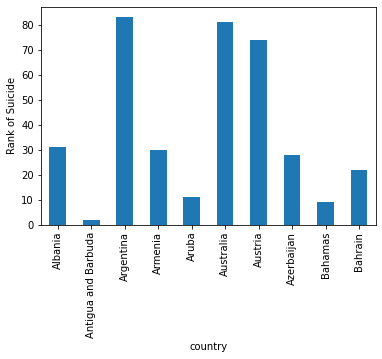

In [562]:
# Top ranked countries by suicide
ranked_countries.head(10).plot(kind="bar", xlabel='country' , ylabel="Rank of Suicide")

####  f)Find the correlations between suicides, GDP per capita and population. What are your conclusions?

In [563]:
correlations = suicide_master_df[['suicides_no', 'gdp_per_capita', 'population']].corr()
print(correlations)

                suicides_no  gdp_per_capita  population
suicides_no        1.000000       -0.003012    0.538977
gdp_per_capita    -0.003012        1.000000   -0.038211
population         0.538977       -0.038211    1.000000


<AxesSubplot:>

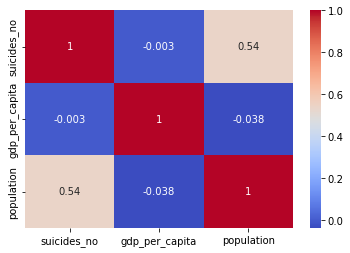

In [564]:
sns.heatmap(correlations, annot=True, cmap='coolwarm')

The value -0.003 indicates a weak negative correlation between the No of sucides and GDP per capita. This suggests that as the GDP per capita increases, the number of suicides tends to decrease slightly. However, the correlation is very weak, which means that the relationship between the two variables is not very strong or consistent.

The value 0.54 indicates a moderate positive correlation between the No of suicides and population. This suggests that as the population increases, the number of suicides also tends to increase. This is not surprising, as more people generally means more suicides, but there are many other factors that can influence suicide rates as well.

The value 0.038 indicates a weak negative correlation between GDP per capital and Population. This suggests that as the population increases, the GDP per capita tends to decrease slightly. However, the correlation is very weak, which means that the relationship between the two variables is not very strong or consistent.

From the foregoing, we can conclude that there is no strong relationship between these variables. The correlations are generally weak to moderate, which suggests that the relationship between these variables is complex and cannot be easily explained by a simple linear relationship

#### g)Use appropriate visual notation to visualise total suicides over years. Describe your findings

In [565]:
# group the suicide_master_df by year and sum the number of suicides
suicides_per_year = suicide_master_df.groupby('year')['suicides_no'].sum()

In [566]:
#suicides per year index
suicides_per_year.index

Int64Index([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

In [567]:
#suicides per year values
suicides_per_year.values

array([ 89009,  87541, 101102,  94683, 120329, 131333, 159158, 160488,
       166539, 199798, 183136, 175193, 179995, 188787, 165543, 188305,
       199235, 175986, 196949, 192027, 163689, 183132, 169688, 192607,
       200782, 179311, 197838, 180957, 172484, 162234, 157317,  13794])

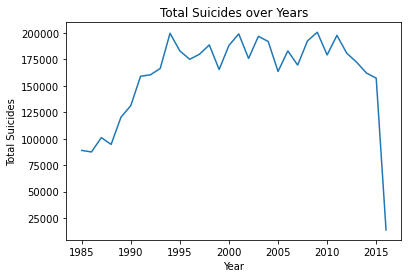

In [568]:
# create a line chart
plt.plot(suicides_per_year.index, suicides_per_year.values)
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Suicides over Years')

plt.show()

This visualization shows the overall trend in Total Suicides over Years, the overall number of suicides climbed consistently from 1985 to 1995, with a sharp increse in the early 1990s. Suicides then peaked in the mid-1990s before progressively dropping until about the year 2000. The total number of suicides remained largely consistent after 2000.

It is worth noting that this visualization only shows the overall trend and does not take into account any differences between countries, age groups, or other factors that may be important in understanding suicide rates. Therefore, additional analyses may be necessary to fully understand the patterns and factors associated with suicide over time.

####  h)Compare suicides by gender over years and state your conclusions

In [569]:
# # group the suicide_master_df by year and gender and sum the number of suicides
suicides_gender= suicide_master_df.groupby(['year', 'sex'])['suicides_no'].sum().unstack()
suicides_gender

sex,female,male
year,,
1985,27115,61894
1986,27606,59935
1987,28454,72648
1988,24807,69876
1989,32757,87572
1990,35529,95804
1991,40109,119049
1992,41820,118668
1993,44239,122300


Text(0.5, 1.0, 'Comparison of suicides by gender over years ')

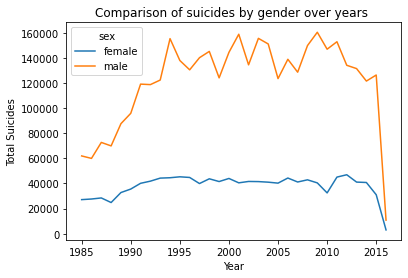

In [570]:
suicides_gender.plot()
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Comparison of suicides by gender over years ')

Based on this chart, we can observe that throughout the entire time period, males consistently had higher suicide rates than females. However, the trends in suicide rates differ between males and females over time. For males, the number of suicides increased steadily from 1985 to 1995, with a sharp increase in the early 1990s, then peaked in the mid-1990s, before gradually declining until around 2000. After 2000, the total number of suicides remained relatively stable. For females, the number of suicides increased more gradually from 1985 to 1995 and  remained relatively stablewith a peak in the late 1990s, then declined until around 2005, before gradually increasing again.


From the foregoing, The graph suggests that suicide prevention and intervention initiatives for males and females, as well as different age groups and geographies, may need to be handled differently. It is also worth noting that the data shown in this visualisation is a compilation of many different countries, and it is probable that cultural, social, and economic variables influence suicide rates differently across different areas and countries. As a result, further research may be required to completely comprehend the patterns and causes related with suicide rates across time and among different populations.

####  i)Calculate and Visualise suicides on generation and on age group. Describe your findings.

In [571]:
# group the suicide_master_df by generation and by age and sum sucicides_no
suicides_by_gen_age = suicide_master_df.groupby(['generation', 'age'])['suicides_no'].sum().unstack()
suicides_by_gen_age

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
generation,,,,,,
Boomers,NaN,879247.0,1779445.0,NaN,NaN,NaN
G.I. Generation,NaN,NaN,NaN,NaN,NaN,536730.0
Generation X,642033.0,NaN,NaN,NaN,NaN,NaN
Millennials,NaN,NaN,NaN,46090.0,NaN,NaN
Silent,NaN,NaN,NaN,NaN,1245424.0,NaN


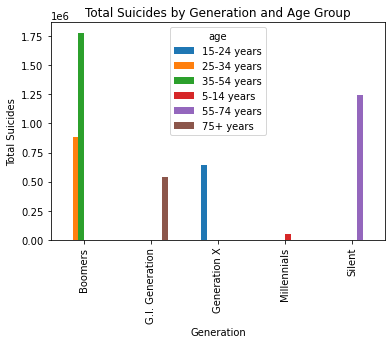

In [572]:
# create a bar chart
suicides_by_gen_age.plot(kind="bar")

# set the axis labels and title
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Generation and Age Group')

# show the chart
plt.show()




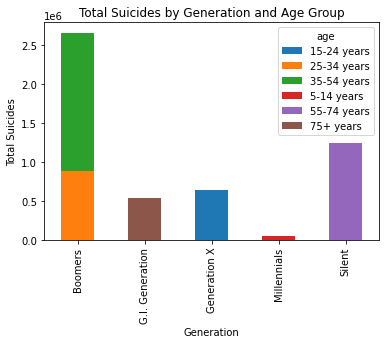

In [573]:
# Let create a stacked bar chart
suicides_by_gen_age.plot(kind="bar", stacked=True)
# set the axis labels and title
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Generation and Age Group')

# show the chart
plt.show()


Based on this chart, we can observe that the age group with the highest number of suicides is 35-54 years, followed by 55-74 years and 25-34 years. The age group with the lowest number of suicides is 5-14 years. We can also see that the Boomers and Silent generations had the highest number of suicides, while the Generation Z and the Millenials had the lowest


 From the foregoing, this visualization suggests that suicide prevention and intervention efforts may need to target specific age groups and generations, with a focus on the middle-aged population. It is also important to consider the potential cultural, social, and economic factors that may be contributing to the observed patterns in suicide rates across different age groups and generations.